밤하늘과 우주 혹은 관련 사물을 떠올리게 하는 곡
===
일단 rough 하게 서로 특징을 비교해보고, 시각화 결과를 보면서 정밀도를 높이는 방법과 분석에의 활용 방안을 고민해보기로 했다.

## 1. 시간에 따른 진폭 변화 보기<br>
* 소리에서 진폭은 소리의 세기를 의미한다. 앞서 다른 카테고리에서 시간에 따른 진폭 변화를 살펴보았는데, 곡의 극적 전개, 기승전결이 뚜렷한 곡에서 진폭 변화가 뚜렷하게 드러나는 것으로 확인되었다. 따라서 본 카테고리에서도 곡의 특징을 가장 잘 나타내는 부분을 잘라 시간에 따른 진폭 변화를 분석해보기로 했다.
* 일단은 3개의 데이터만 가지고 해보기로 했다. 필요한 것은 바로 아래 셀에서 한 번에 업로드하며, 이는 파일을 열었다 닫고 새로 실행할 때 import 부분이 분산되어, import 문이 들어가 있는 모든 셀을 일일이 실행하지 않게 하기 위해서다.
* 처음에는 원래 음원의 샘플링 비율인 44100Hz으로 했다. 하지만 파형을 정확히 확인할 수가 없어 90까지 줄였다.

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from pydub import AudioSegment
import librosa.display
import librosa.feature

In [10]:
#1. mikrokosmos1
#저장된 폴더에서 파일 불러오기
mp3file = '/Users/wonkyungkim/Documents/pythondev/capstone/music1/mikrokosmos.mp3'
file_dir, file_id = os.path.split(mp3file)
mikrokosmos1, sr = librosa.load(mp3file, sr=90, offset=0.0, duration=4.294)
time = np.linspace(0, 4.294, 387) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, mikrokosmos1, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
#plt.savefig(file_id+'.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wonkyungkim/Documents/pythondev/capstone/music1/mikrokosmos.mp3'

In [11]:
meteor, sr = librosa.load(mp3file, sr=90, offset=10.357, duration=15.348)
time = np.linspace(10.357, 15.348, 1382) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, meteor, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
#plt.savefig(file_id+'.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wonkyungkim/Documents/pythondev/capstone/music1/mikrokosmos.mp3'

In [12]:
mp3file = '/Users/wonkyungkim/Documents/pythondev/capstone/music1/magicshop.mp3'
file_dir, file_id = os.path.split(mp3file)
magicshop, sr = librosa.load(mp3file, sr=90, offset=220.426, duration=226.267)
time = np.linspace(220.426, 226.267, 4977) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, magicshop, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title(file_id) # 제목
#plt.savefig(file_id+'.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/wonkyungkim/Documents/pythondev/capstone/music1/magicshop.mp3'

### ! 여기까지 관찰 포인트
* 위 3개 그래프를 관찰해보면 첫번째 곡과 나머지 두 곡의 최대/최소값 범위 분포가 크게 차이나는 것을 볼 수 있다. 왜 이런 일이 생겼을까?
* 샘플링 비율을 44100에서 90으로 바꾸니 진폭의 값 분포 범위가 완전히 달라졌다.<br>
-> "샘플링 주파수(신호가 초당 샘플링되는 횟수)는 샘플링 속도라고 부릅니다. 샘플링 주파수가 높으면 재생할 수 있는 주파수 범위가 넓어집니다."<br>https://manual.yamaha.com/av/18/rxv485/ko-KR/341956619.html
* 계속 Pysound에 관련된 에러가 나는 것을 확인할 수 있다. 뿐만 아니라 그래프가 너무 촘촘해 파형을 제대로 알 수 없어 좀 더 넓은 시간의 간격으로 데이터를 추출해 새로운 데이터를 만드는 과정이 필요해 보였다. 이에 대해 찾아보니, librosa는 mp3 음원은 지원하지 않아 (py)soundfile로 바꿔야 한다는 사실을 알게 됐다. 앞으로의 데이터 분석을 위해서는 이 자료형이 필수적이었다.<br><br>
위와 같은 관찰 결과에서 **볼륨 정규화(normalize)** 과정이 필요하다고 판단했다. 아래와 같이 soundfile을 만든 뒤 정규화를 진행하려 한다.<br>
*참고 자료: https://keunwoochoi.blogspot.com/2019/05/blog-post_9.html, https://keunwoochoi.blogspot.com/2016/03/2.html, https://keunwoochoi.blogspot.com/2019/06/blog-post.html

## 2. 전처리에 대한 고민과 리서치
*  신호가 가지고 있는 정보를 최대한 보존하면서 **전체 데이터의 크기를 최소화**해야 효율적으로 연산을 할 수 있다.
* **decoding**: 한 선행 연구(논문)을 통해 **압축된 파일을 비압축 파형 데이터 형태로 복원해야 한다**는 것을 알게 되었다. 하지만 이걸 어떻게 하는지 여전히 **오리무중**이다.<br>
오디오 데이터 전처리에 대한 포스트(https://keunwoochoi.blogspot.com/2019/06/blog-post.html)를 참고해보면 디코딩을 하라는 이야기는 없고 **오히려 wav(int16)나 numpy array(int16/float32/etc)로 변환하라 말한다**. mp3는 압축된 형태고, wav는 그렇지 않은 형태로 용량이 훨씬 크다.<br>그러나 다른 포스트에선 오히려, mp3를 wav로 변환하는 것은 용량만 손해고 이득이 없다고 (https://it.donga.com/18897/)하여 **혼란스러운 상황**이다.
* **channel**: 모노/스테레오의 차이는 좌/우 채널 구분 여부에 불과하므로, 스테레오를 모노로 처리하는 것 이상의 처리는 필요하지 않다.
* **bitrate**: 세 음원 모두 비트레이트는 192kbps로 동일한 것을 확인했다. 따라서 파형 비교에 문제가 없을 것이다.<br>
### 1) 어떤 파일을 생성할 것인가?
* **soundfile 라이브러리를 이용해 pysoundfile을 만드는 법**: wav, flac 등 매우 다양한 형식으로 변환이 가능하다. float/double/int 만으로 이루어진 raw data도 만들 수 있다. 문제는 도대체 이 중 무엇을 선택해야 하는지 모르겠다는 것이다. 참고로 pysoundfile의 근본은 libsndfile이다. 가능한 subtype은 아래 코드를 통해 열거해두었다.

In [13]:
sf.available_subtypes()

{'PCM_S8': 'Signed 8 bit PCM',
 'PCM_16': 'Signed 16 bit PCM',
 'PCM_24': 'Signed 24 bit PCM',
 'PCM_32': 'Signed 32 bit PCM',
 'PCM_U8': 'Unsigned 8 bit PCM',
 'FLOAT': '32 bit float',
 'DOUBLE': '64 bit float',
 'ULAW': 'U-Law',
 'ALAW': 'A-Law',
 'IMA_ADPCM': 'IMA ADPCM',
 'MS_ADPCM': 'Microsoft ADPCM',
 'GSM610': 'GSM 6.10',
 'G721_32': '32kbs G721 ADPCM',
 'G723_24': '24kbs G723 ADPCM',
 'DWVW_12': '12 bit DWVW',
 'DWVW_16': '16 bit DWVW',
 'DWVW_24': '24 bit DWVW',
 'VOX_ADPCM': 'VOX ADPCM',
 'DPCM_16': '16 bit DPCM',
 'DPCM_8': '8 bit DPCM',
 'VORBIS': 'Vorbis',
 'ALAC_16': '16 bit ALAC',
 'ALAC_20': '20 bit ALAC',
 'ALAC_24': '24 bit ALAC',
 'ALAC_32': '32 bit ALAC'}

디코딩 방법엔 3가지가 있었다. 1)소프트웨어 사용 2)MacOS 패키지 관리자 homebrew를 통해 설치한 ffmpeg 사용 3)c++ code 사용<br>그 중 첫번째 방법은 하지 않고 나머지 두 방법만 시도를 해보았다.

#### 두번째 방법 시도
ffmpeg 디코딩 결과 파일을 보고 이를 다시 raw, wav 등의 파일로 변환한다.
이 중 두번째 방법을 사용하려 시도했으나, 디코딩에 대한 여전한 의문으로 사용하지 못했다.

#### 세번째 방법 시도
core.block_read를 통해 곡 전체를 읽어온다. 단, 이 방법은 곡 분석 전략을 정하기 전에는 사용하지 않기로 했다. 파트별로 쪼개서 파트별로 서로 비교를 한다던가, 전체 한 다음에 spectrum 특징 중심으로 백그라운드 뮤직 중심으로 살펴본다던가(karaoke/instrumental 음원을 사용한다던가)... 그냥은 안됨. 곡의 전개를 어떻게 분석할 것인가... 이런 것도 그렇고, 결국은 특징을 잘 나타내는 부분을 따로 떼어와서 분석할 수밖에 없음.

결론: 디코딩 매커니즘을 알아냈다. 디코딩으로 산출되어야 할 결과물은 순수 파동으로 이루어진 데이터이고, 이에 대해 고속 푸리에 변환을 거쳐야 하는 것이다. 하지만 정말 여러 가지를 알아봤는데, 결론적으로 보통 ffmpeg를 거쳐 wav로 변환하면 된다는 것이 중론이었다. 따라서 이 방법대로 하기로 했다. 이떄 pydub라는 파이썬으로 구현된 ffmpeg mp3 디코더 라이브러리를 사용하기로 했다.

In [14]:
#sound = AudioSegment.from_mp3("mikrokosmos.mp3")
#sound.export("mikrokosmos.wav", format="wav")
sound = AudioSegment.from_mp3("meteor.mp3")
sound.export("meteor.wav", format="wav")
sound = AudioSegment.from_mp3("magicshop.mp3")
sound.export("magicshop.wav", format="wav")
sound = AudioSegment.from_mp3("thefeeling.mp3")
sound.export("thefeeling.wav", format="wav")
sound = AudioSegment.from_mp3("askyfullofstars.mp3")
sound.export("askyfullofstars.wav", format="wav")

FileNotFoundError: [Errno 2] No such file or directory: 'meteor.mp3'

## 3. 원하는 구간 잘라내어 pysoundfile 파일 만들기

In [15]:
mikrokosmos1, sr = sf.read('mikrokosmos.wav', stop=4.294, dtype='int16', samplerate=90, channels=90)
#sf.write('mikrokosmos1.raw', mikrokosmos1, 90, subtype='FLOAT')
print(mikrokosmos1)

TypeError: Not allowed for existing files (except 'RAW'): samplerate, channels, format, subtype, endian

충격적이게도 구간을 정수 단위로밖에 자르지 못한다. 그냥 소프트웨어를 이용해 필요한 구간을 full wav 파일로 자르기로 했다.

## 4. Feature Extraction
이 카테고리에 속한 곡들에 대해서 다음과 같은 것들을 분석해보고자 한다.
* **Magnitude scaling**: 한 곡(meteor.wav)을 제외하고 모든 곡의 전개가 비슷하다. 처음엔 우주를 묘사하는 듯한 인트로 반주로 시작한다. 1절까지는 비슷한 규모, 분위기를 가진다. 하이라이트 구간이 되기 전 음악의 공간감, 규모가 증폭된다. 하이라이트에서 이전보다 화려한 소리를 선사한다. 따라서 곡 상에서 공간감(혹은 볼륨, 혹은 규모)이 커지는 부분의 위치 변화 정도(최저값, 최고값, 변화율 등)<br>
* **Rhythm Features**: 박자 면에서 어느 정도 유사도를 가지는지 파악해본다. 같은 카테고리 속 곡보단 다른 카테고리의 곡들과 비교했을 때 확실하게 두드러질 것이다.
* **Beat and Tempo**: 속도 면에서 어느 정도 유사도를 가지는지 파악해본다. 같은 카테고리 속 곡보단 다른 카테고리의 곡들과 비교했을 때 확실하게 두드러질 것이다.
* **Spectral features**

### 1) Time Domain Amplitude Waveform

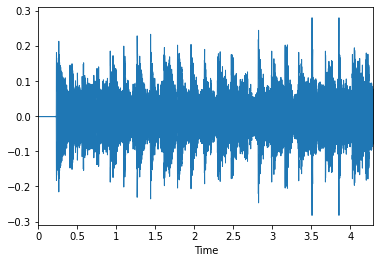

In [16]:
mikrokosmos, sr = librosa.load('mikrokosmos.wav', sr=44100, duration=4.294)
librosa.display.waveplot(mikrokosmos, sr)

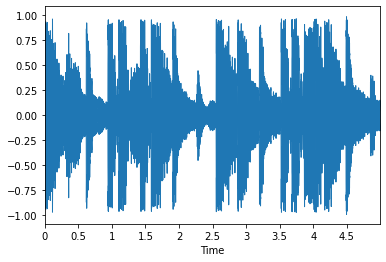

In [17]:
# offset=10.357, duration=15.348
meteor, sr = librosa.load('meteor.wav', sr=44100, offset=10.357, duration=4.991)
librosa.display.waveplot(meteor, sr)

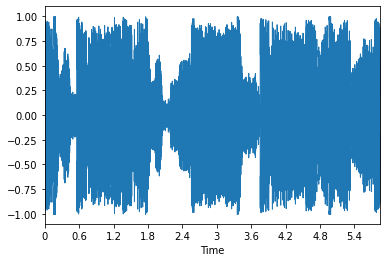

In [18]:
magicshop, sr = librosa.load('magicshop.wav', sr=44100, offset=220.426, duration=5.841)
librosa.display.waveplot(magicshop, sr)

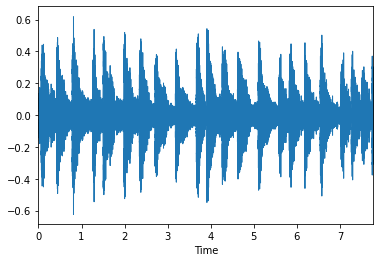

In [19]:
asfos, sr = librosa.load('askyfullofstars.wav', sr=44100, offset=7.741, duration=7.776)
librosa.display.waveplot(asfos, sr)

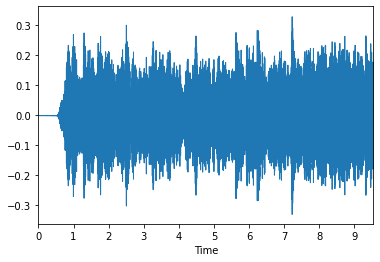

In [20]:
feeling, sr = librosa.load('thefeeling.wav', sr=44100, duration=9.538)
librosa.display.waveplot(feeling, sr)

### 2) short time fourier transform => power spectogram (Magnitude scaling)
* **STFT(short time fourier transform)란?**<br>
데이터에서 시간에 대해 구간을 짧게 나누어 나누어진 여러 구간의 데이터를 각각 푸리에 변환하는 방법. 자동차의 가속신호, transient 신호처럼 시간에 따라 특성이 변하는 신호를 분석하는데 사용된다.<br>**이를 하는 이유를 알 수 있는 내용을 추가하자.**

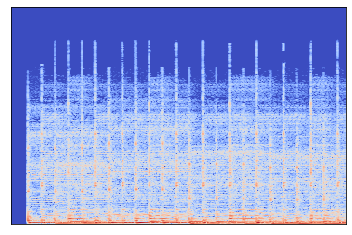

In [21]:
mikrokosmos_sftf = np.abs(librosa.stft(mikrokosmos))
librosa.display.specshow(librosa.amplitude_to_db(mikrokosmos_sftf))

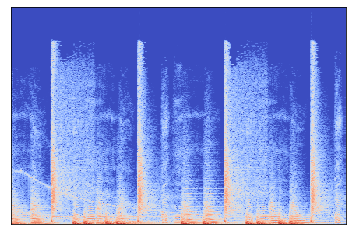

In [22]:
meteor_sftf = np.abs(librosa.stft(meteor))
librosa.display.specshow(librosa.amplitude_to_db(meteor_sftf))

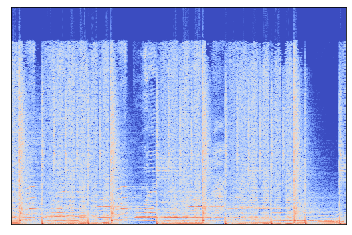

In [23]:
magicshop_stft = np.abs(librosa.stft(magicshop))
librosa.display.specshow(librosa.amplitude_to_db(magicshop_stft))

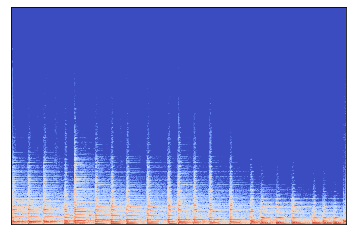

In [24]:
asfos_stft = np.abs(librosa.stft(asfos))
librosa.display.specshow(librosa.amplitude_to_db(asfos_stft))

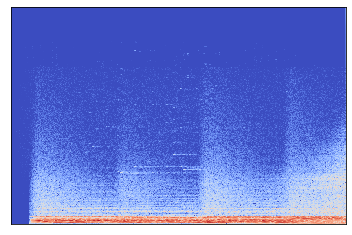

In [25]:
feeling_stft = np.abs(librosa.stft(feeling))
librosa.display.specshow(librosa.amplitude_to_db(feeling_stft))

### ! 여기까지 관찰 포인트
* 도입부 혹은 (도입부가 너무 짧은 경우, 즉 3초 미만인 경우)간주 부분을 비교했는데 아래 두 곡이 위 세 곡과 격차가 심해 보인다.
* x,y축에 들어갈 말을 함수에서 직접 지정할 수 있는 것은 알겠는데, 스케일이 전혀 나오질 않아서 최소값/최대값도 알 수 없고, 값의 분포 간격 같은 것도 전혀 알 수가 없다. 위에서 시간에 따른 진폭 변화를 waveform화 했을 땐 그렇지 않았는데, 여기선 librosa 라이브러리의 함수 혹은 numpy 함수를 이용해 직접 알아내고 설정해야 하는 모양이다. 현재 이에 대해 알아보고 있다.

### 3) Mel-scale spectrogram
사람의 가청 주파수인 8000Hz 이하의 주파수에 대해서만 scaling하여 spectrogram을 만드는 것.

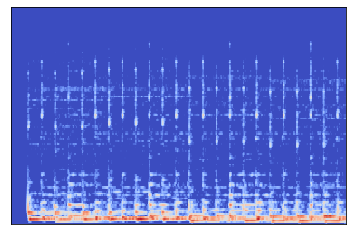

In [26]:
mikrokosmos_mel = librosa.feature.melspectrogram(S=mikrokosmos_sftf**2)
librosa.display.specshow(librosa.amplitude_to_db(mikrokosmos_mel))

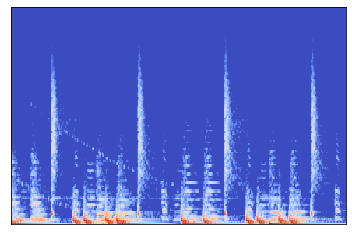

In [27]:
meteor_mel = librosa.feature.melspectrogram(S=meteor_sftf**2)
librosa.display.specshow(librosa.amplitude_to_db(meteor_mel))

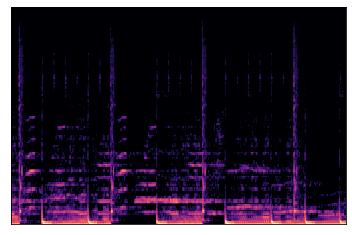

In [28]:
magicshop_mel = librosa.feature.melspectrogram(S=magicshop_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(magicshop_mel))

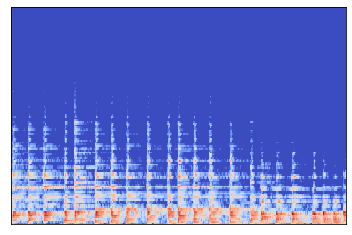

In [29]:
asfos_mel = librosa.feature.melspectrogram(S=asfos_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(asfos_mel))

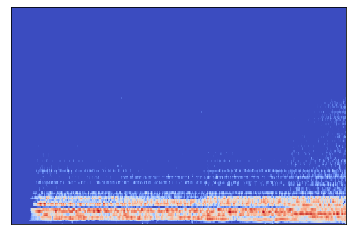

In [30]:
feeling_mel = librosa.feature.melspectrogram(S=feeling_stft**2)
librosa.display.specshow(librosa.amplitude_to_db(feeling_mel))

### ! 여기까지 고찰 결과
* 왜 3번째 데이터 혼자 다른 배경색, 그래프색을 띄는지 모르겠다.

### 4) Chromagram
데이터를 12음계로 쪼개서 피치에 해당하는 것을 음계로 표시하여 피처를 만든 것

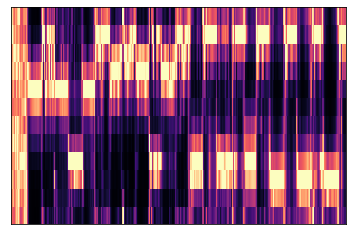

In [31]:
mikro_chroma = librosa.feature.chroma_stft(y=mikrokosmos, sr=sr)
librosa.display.specshow(mikro_chroma)

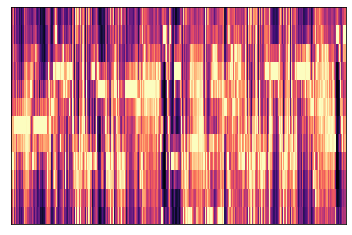

In [32]:
meteor_chroma = librosa.feature.chroma_stft(y=meteor, sr=sr)
librosa.display.specshow(meteor_chroma)

크로마그램 결과를 보면서 생각한 것: 음원 그대로 크로마그램으로 분석해서는 안되겠단 생각을 했다. 음악 안에 다양한 사운드가 혼합되어 있기 때문이다. 그래서 우선 소리를 분리하는 작업을 하는게 필요하다 생각했다.

### 전체에 걸쳐 고민중인 문제:<br>
* 샘플링 레이트를 그대로 유지할 것인가 낮출 것인가? 그렇게하면 어떤 특징 추출, 시각화를 했을 때 기존보다 다른 데이터 간의 차이가 눈에 잘 보인다. 샘플링 레이트는 음원의 음질에 영향을 주는 요소라고 하는데, 음질에만 영향이 있고 데이터 분석에 있어선 데이터 개수를 줄이는 역할 외의 다른 부작용은 없다면 이를 줄이고 싶다. 하지만 이 부분을 잘 모른다
* 카테고리 2번째는 동일한 부분이 반복되는 형태의 백그라운드 음악이 쓰이지 않아 3~4분 곡 전체를 분석하는 것밖에 방법이 없다. 그런데 곡 전체를 분석하면 데이터의 양이 어마어마하기 때문에 도입부, 1절, 하이라이트, 2절 후 고조 단계, 마지막 구절 이렇게 나눠서 분석해야 하는데, 이 방법 이외의 다른 방법이 있는지 고민해보고 있다.